In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img=cv2.imread('./Images/Messi/a1.jpg')
img.shape

(408, 612, 3)

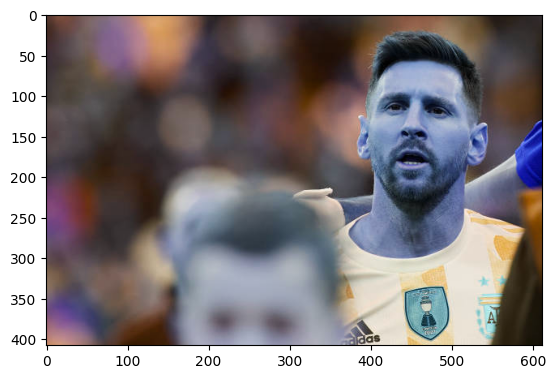

In [3]:
plt.imshow(img)

In [4]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(408, 612)

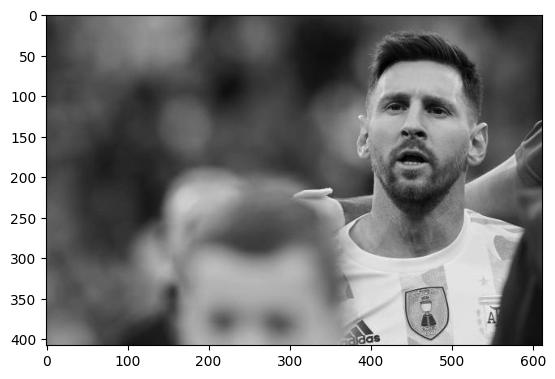

In [5]:
plt.imshow(gray, cmap='gray')

In [6]:
face_cascade = cv2.CascadeClassifier(r'E:\ImageClassification\Cascade\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(r'E:\ImageClassification\Cascade\haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[379,  55, 155, 155]])

In [7]:
(x,y,w,h) = faces[0]
x,y,w,h

(379, 55, 155, 155)

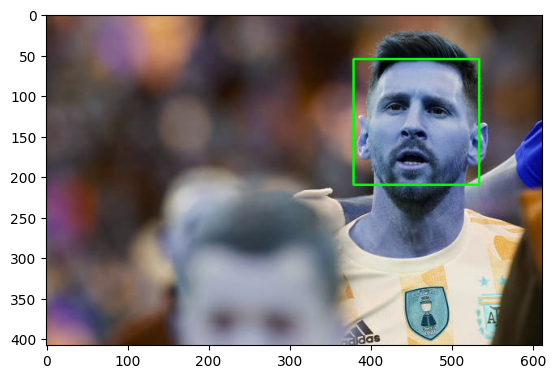

In [8]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(face_img)

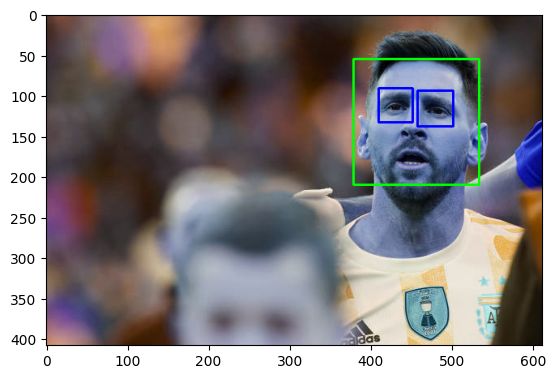

In [9]:
# The below function is used to return an cropped image of the face if both eyes of the person are detected otherwise it will return nothing

cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

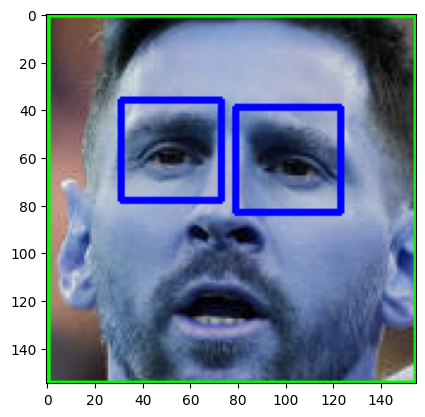

In [10]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

This is our Region of Interest (ROI)

In [11]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

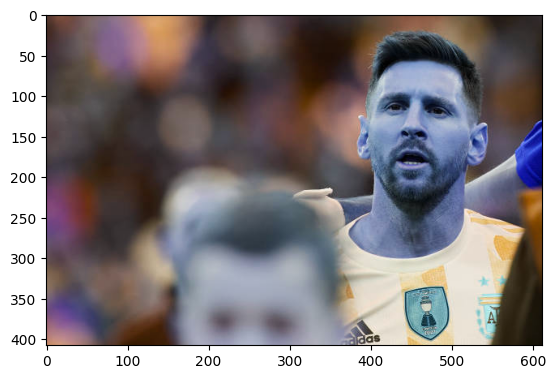

In [12]:
original_image = cv2.imread('./Images/Messi/a1.jpg')
plt.imshow(original_image)

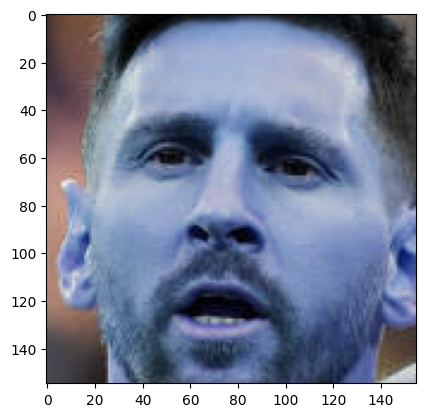

In [13]:
cropped_image = get_cropped_image_if_2_eyes('./Images/Messi/a1.jpg')
plt.imshow(cropped_image)

In [14]:
path_to_images=('./Images/')
path_to_cropped_images=("./Images/cropped/")

In [15]:
import os
img_dirs = []
for entry in os.scandir(path_to_images):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [16]:
img_dirs

['./Images/Benzema',
 './Images/Mbappe',
 './Images/Messi',
 './Images/Neymar',
 './Images/Ronaldo']

In [17]:
import shutil
if os.path.exists(path_to_cropped_images):
     shutil.rmtree(path_to_cropped_images)
os.mkdir(path_to_cropped_images)

In [18]:
cropped_image_dirs = []
player_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    player_name = img_dir.split('/')[-1]
    print(player_name)
    
    player_file_names_dict[player_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cropped_images + player_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = player_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            player_file_names_dict[player_name].append(cropped_file_path)
            count += 1   

Benzema
Generating cropped images in folder:  ./Images/cropped/Benzema
Mbappe
Generating cropped images in folder:  ./Images/cropped/Mbappe
Messi
Generating cropped images in folder:  ./Images/cropped/Messi
Neymar
Generating cropped images in folder:  ./Images/cropped/Neymar
Ronaldo
Generating cropped images in folder:  ./Images/cropped/Ronaldo


## Wavelet Transformation

In [19]:
import pywt   

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

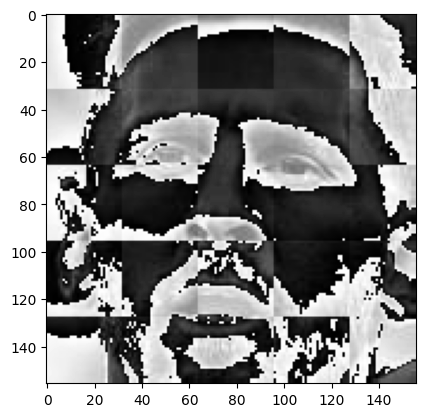

In [20]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [42]:
player_file_names_dict 

{'Benzema': ['./Images/cropped/Benzema\\Benzema1.png',
  './Images/cropped/Benzema\\Benzema10.png',
  './Images/cropped/Benzema\\Benzema11.png',
  './Images/cropped/Benzema\\Benzema12.png',
  './Images/cropped/Benzema\\Benzema13.png',
  './Images/cropped/Benzema\\Benzema14.png',
  './Images/cropped/Benzema\\Benzema15.png',
  './Images/cropped/Benzema\\Benzema16.png',
  './Images/cropped/Benzema\\Benzema17.png',
  './Images/cropped/Benzema\\Benzema18.png',
  './Images/cropped/Benzema\\Benzema19.png',
  './Images/cropped/Benzema\\Benzema2.png',
  './Images/cropped/Benzema\\Benzema20.png',
  './Images/cropped/Benzema\\Benzema21.png',
  './Images/cropped/Benzema\\Benzema22.png',
  './Images/cropped/Benzema\\Benzema23.png',
  './Images/cropped/Benzema\\Benzema24.png',
  './Images/cropped/Benzema\\Benzema25.png',
  './Images/cropped/Benzema\\Benzema26.png',
  './Images/cropped/Benzema\\Benzema27.png',
  './Images/cropped/Benzema\\Benzema28.png',
  './Images/cropped/Benzema\\Benzema29.png',
 

In [43]:
player_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    player_file_names_dict[celebrity_name] = file_list
player_file_names_dict

{'Benzema': ['./Images/cropped/Benzema\\Benzema1.png',
  './Images/cropped/Benzema\\Benzema10.png',
  './Images/cropped/Benzema\\Benzema11.png',
  './Images/cropped/Benzema\\Benzema12.png',
  './Images/cropped/Benzema\\Benzema13.png',
  './Images/cropped/Benzema\\Benzema14.png',
  './Images/cropped/Benzema\\Benzema15.png',
  './Images/cropped/Benzema\\Benzema16.png',
  './Images/cropped/Benzema\\Benzema17.png',
  './Images/cropped/Benzema\\Benzema18.png',
  './Images/cropped/Benzema\\Benzema19.png',
  './Images/cropped/Benzema\\Benzema2.png',
  './Images/cropped/Benzema\\Benzema20.png',
  './Images/cropped/Benzema\\Benzema21.png',
  './Images/cropped/Benzema\\Benzema22.png',
  './Images/cropped/Benzema\\Benzema23.png',
  './Images/cropped/Benzema\\Benzema24.png',
  './Images/cropped/Benzema\\Benzema25.png',
  './Images/cropped/Benzema\\Benzema26.png',
  './Images/cropped/Benzema\\Benzema27.png',
  './Images/cropped/Benzema\\Benzema28.png',
  './Images/cropped/Benzema\\Benzema29.png',
 

In [44]:
class_dict = {}
count = 0
for player_name in player_file_names_dict.keys():
    class_dict[player_name] = count
    count = count + 1
class_dict

{'Benzema': 0, 'Mbappe': 1, 'Messi': 2, 'Neymar': 3, 'Ronaldo': 4}

In [45]:
X, y = [], []
for player_name, training_files in player_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[player_name])     

In [46]:
len(X)


150

In [47]:
len(X[0])

4096

In [48]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(150, 4096)

## Model Training

In [49]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [52]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [53]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.758498,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.563241,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.794862,{'logisticregression__C': 1}


In [54]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [55]:
best_estimators['svm'].score(X_test,y_test)

0.7894736842105263

In [56]:
best_estimators['random_forest'].score(X_test,y_test)

0.5789473684210527

In [57]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8421052631578947

In [58]:
best_clf = best_estimators['logistic_regression']

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 8,  0,  0,  0,  0],
       [ 0, 10,  0,  0,  1],
       [ 1,  1,  5,  0,  1],
       [ 0,  0,  1,  4,  0],
       [ 0,  0,  0,  1,  5]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

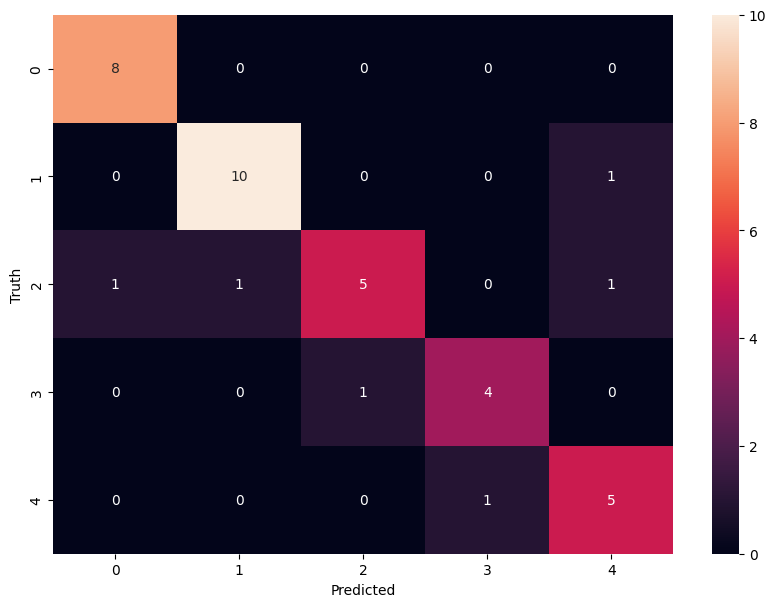

In [60]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [61]:
class_dict

{'Benzema': 0, 'Mbappe': 1, 'Messi': 2, 'Neymar': 3, 'Ronaldo': 4}

## Saving the Model

In [62]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

## Saving Class Dictionary

In [63]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))